In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

import seaborn as sns
from datetime import * 

# EDA

In [2]:
df = pd.read_csv('df_train_dust.csv')
df

,시리얼번호,전송시간,미세먼지,위도,경도
0,OC3CL200012,2022-01-01 00:00:00,11.0,37.544002,127.069731
1,OC3CL200012,2022-01-01 01:00:00,13.0,37.544002,127.069731
2,OC3CL200012,2022-01-01 02:00:00,15.5,37.544002,127.069731
3,OC3CL200012,2022-01-01 03:00:00,18.0,37.544002,127.069731
4,OC3CL200012,2022-01-01 04:00:00,13.0,37.544002,127.069731
...,...,...,...,...,...
1434235,V02Q1941013,2022-03-31 19:00:00,0.0,37.524531,126.855007
1434236,V02Q1941013,2022-03-31 20:00:00,0.0,37.524531,126.855007
1434237,V02Q1941013,2022-03-31 21:00:00,0.0,37.524531,126.855007
1434238,V02Q1941013,2022-03-31 22:00:00,0.0,37.524531,126.855007


In [4]:
meta = pd.read_excel('./data/sdot_data/dust_location_meta.xlsx', sheet_name=1, header=3)
meta = meta.iloc[2:,1:9]
meta1 = meta[['시리얼번호','자치구']]
df1 = pd.merge(df, meta1, on=['시리얼번호'], how='left')
df1

,시리얼번호,전송시간,미세먼지,위도,경도,자치구
0,OC3CL200012,2022-01-01 00:00:00,11.0,37.544002,127.069731,광진구
1,OC3CL200012,2022-01-01 01:00:00,13.0,37.544002,127.069731,광진구
2,OC3CL200012,2022-01-01 02:00:00,15.5,37.544002,127.069731,광진구
3,OC3CL200012,2022-01-01 03:00:00,18.0,37.544002,127.069731,광진구
4,OC3CL200012,2022-01-01 04:00:00,13.0,37.544002,127.069731,광진구
...,...,...,...,...,...,...
1434235,V02Q1941013,2022-03-31 19:00:00,0.0,37.524531,126.855007,양천구
1434236,V02Q1941013,2022-03-31 20:00:00,0.0,37.524531,126.855007,양천구
1434237,V02Q1941013,2022-03-31 21:00:00,0.0,37.524531,126.855007,양천구
1434238,V02Q1941013,2022-03-31 22:00:00,0.0,37.524531,126.855007,양천구


In [5]:
df1['시리얼번호'].nunique()

664

In [6]:
pd.DataFrame(df1['미세먼지'].describe()).T

,count,mean,std,min,25%,50%,75%,max
미세먼지,1434240.0,29.972169,25.602731,0.0,13.0,23.0,40.0,1000.0


Text(0.5, 1.0, 'Histogram of fine dust concentration')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABL

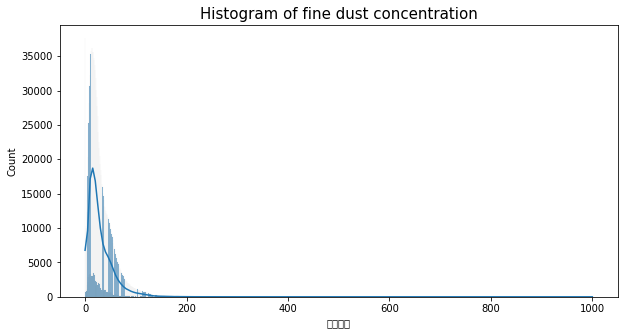

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=df1, x="미세먼지", kde=True)
plt.title('Histogram of fine dust concentration', fontsize=15)
# df1['미세먼지'].hist()

## 지역별로 살펴보기

In [8]:
df_sort = df1.groupby(['자치구']).mean().sort_values(by='미세먼지', ascending=False).reset_index()
# df_sort[:10]
df_sort

,자치구,미세먼지,위도,경도
0,강남구,32.806429,37.499458,127.055842
1,용산구,31.828313,37.532208,126.975945
2,금천구,31.580718,37.454271,126.908429
3,양천구,31.405980,37.528151,126.854671
4,강동구,30.949167,37.546419,127.141636
5,광진구,30.730541,37.547946,127.083245
6,영등포구,30.718673,37.516360,126.904557
7,중구,30.708139,37.562592,126.992907
8,동대문구,30.638567,37.580281,127.053556
9,서초구,30.593718,37.487936,127.010307


In [9]:
df_sort = df1.groupby(['자치구','시리얼번호']).mean().sort_values(by='미세먼지', ascending=False).reset_index()
# df_sort[:10]
df_sort

,자치구,시리얼번호,미세먼지,위도,경도
0,양천구,V02Q1940741,48.080093,37.535751,126.878574
1,강동구,V02Q1940142,47.130787,37.550545,127.127873
2,강남구,V02Q1940094,46.468287,37.466829,127.108893
3,마포구,V02Q1940945,45.669444,37.555244,126.906903
4,마포구,V02Q1940624,45.641667,37.554582,126.903854
...,...,...,...,...,...
659,노원구,V02Q1940226,7.751620,37.615449,127.064609
660,중랑구,V02Q1940241,6.846296,37.599989,127.087073
661,마포구,V02Q1941006,6.543287,37.555257,126.904267
662,노원구,V02Q1940153,6.392361,37.679806,127.063059


Text(0.5, 1.0, '서초구')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib

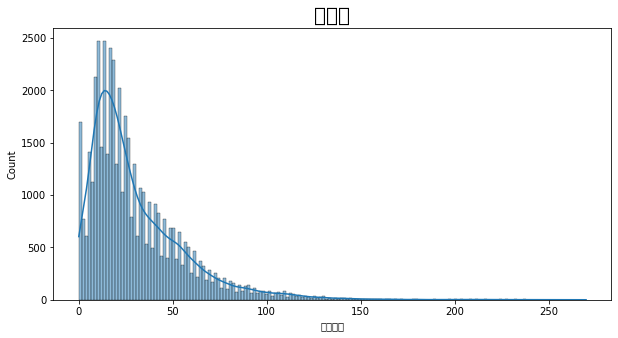

In [10]:
gu='서초구'
temp = df1[df1['자치구']==gu]["미세먼지"]
plt.figure(figsize=(10,5))
sns.histplot(temp, kde=True)
plt.title(gu, fontsize=20)

Text(0.5, 1.0, '노원구')

/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47676 

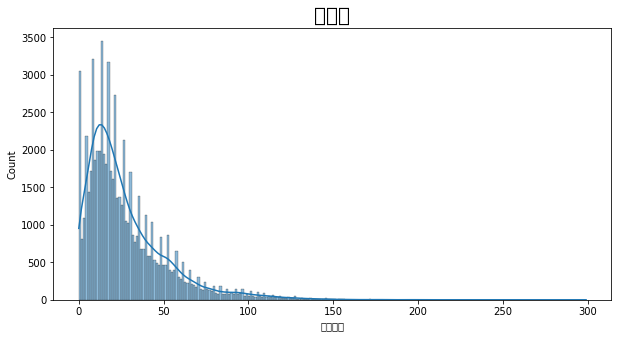

In [11]:
gu='노원구'
temp = df1[df1['자치구']==gu]["미세먼지"]
plt.figure(figsize=(10,5))
sns.histplot(temp, kde=True)
plt.title(gu, fontsize=20)

In [12]:
df1['전송시간'] = pd.to_datetime(df1['전송시간'])

Text(0.5, 1.0, 'V02Q1940741')

/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 494

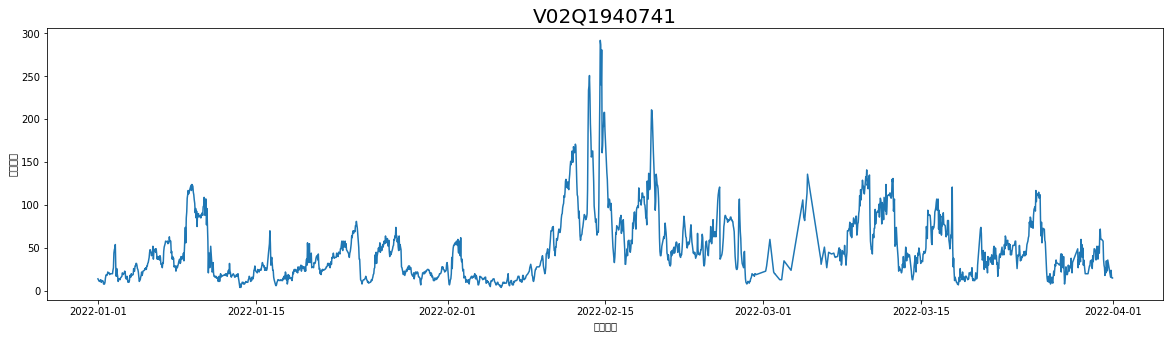

In [13]:
site='V02Q1940741'
temp = df1[df1['시리얼번호']==site]
plt.figure(figsize=(20,5))
sns.lineplot(x='전송시간', y='미세먼지', data=temp)
plt.title(site, fontsize=20)

Text(0.5, 1.0, 'V02Q1940941')

/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 494

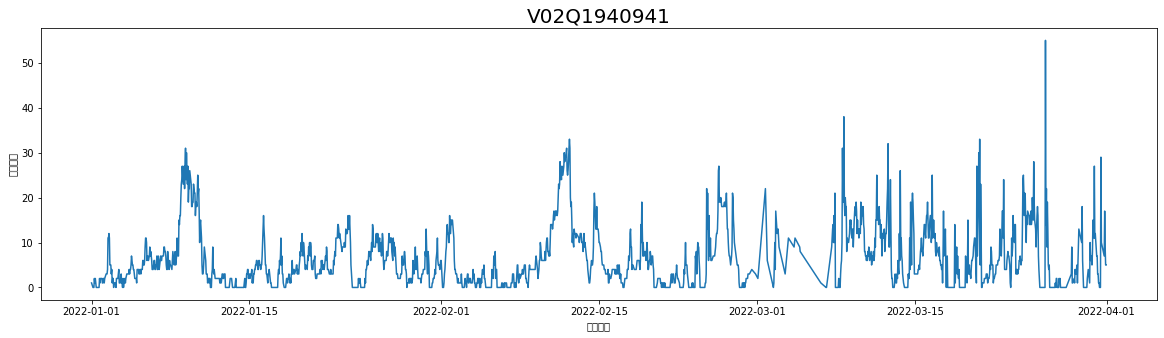

In [14]:
site='V02Q1940941'
temp = df1[df1['시리얼번호']==site]
plt.figure(figsize=(20,5))
sns.lineplot(x='전송시간', y='미세먼지', data=temp)
plt.title(site, fontsize=20)

Text(0, 0.5, 'latitude')

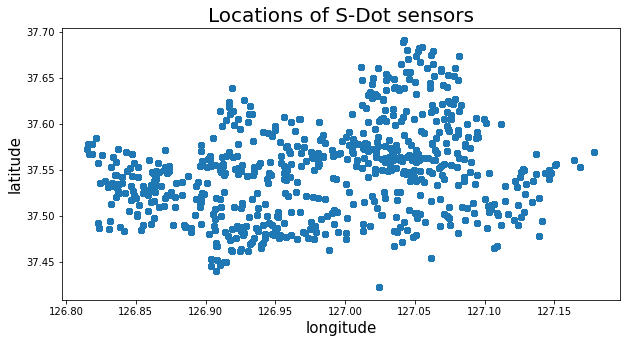

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(df1['경도'],df1['위도'])
# sns.scatterplot(data=df1, x="경도", y="위도", alpha=0.1)
plt.title('Locations of S-Dot sensors', fontsize=20)
plt.xlabel('longitude', fontsize=15)
plt.ylabel('latitude', fontsize=15)

In [16]:
c = 10 ; vmax = 100

for i in range(0,,6):
    fig = plt.figure(figsize=(20,10))
    target = datetime(2022,1,1,0,0) + timedelta(hours=i)

    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(train_image[i][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
    ax1.set_title(f'{str(target)}', fontsize=15)
    
    plt.show()
    

SyntaxError: invalid syntax (1658602162.py, line 3)

In [ ]:
STAMP=1 ; LAG=2 ; STEP=1
single_step_forecast(STAMP, LAG, STEP)